# Vivek Kittali

# Bank Marketing Campaign

The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed.


Objective: This project will enable the bank to develop a better understanding of its customer base, predict customer's response to its telemarketing campaign and establish a target customer profile for future marketing plans.By Analysing all the features in the data we can know about the customers behaviour about the subcription by which we can predict the suitable customers.So to deal with this objective we need to go through following steps.
1) Fetch the data
2) Understand the data
3) Data cleaning- Working on the missing or null values
4) Exploratory data Analysis
5) Feature Engineering
6) Model Building
7) Conclusion

In [2]:
import pandas as pd
import numpy as np

 # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [3]:
Bank_data = pd.read_excel(r'C:\Users\H P\Downloads\bank_full_renew.xlsx')

In [4]:
Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
Bank_data.shape

(45211, 17)

In [6]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
for column in Bank_data.columns:
    print(column,Bank_data[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [8]:
strgdata = Bank_data.select_dtypes(include="object")
for column in strgdata:
    print(strgdata[column].value_counts())
    print ("-" * 20)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
--------------------
no     44396
yes      815
Name: default, dtype: int64
--------------------
yes    25130
no     20081
Name: housing, dtype: int64
--------------------
no     37967
yes     7244
Name: loan, dtype: int64
--------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
--------------------
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar

In [9]:
Bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
Bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
Bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [4]:
categorical_features=['job','marital','education','default','housing','loan','contact','month','poutcome']
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

# Exploratory Data Analysis

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

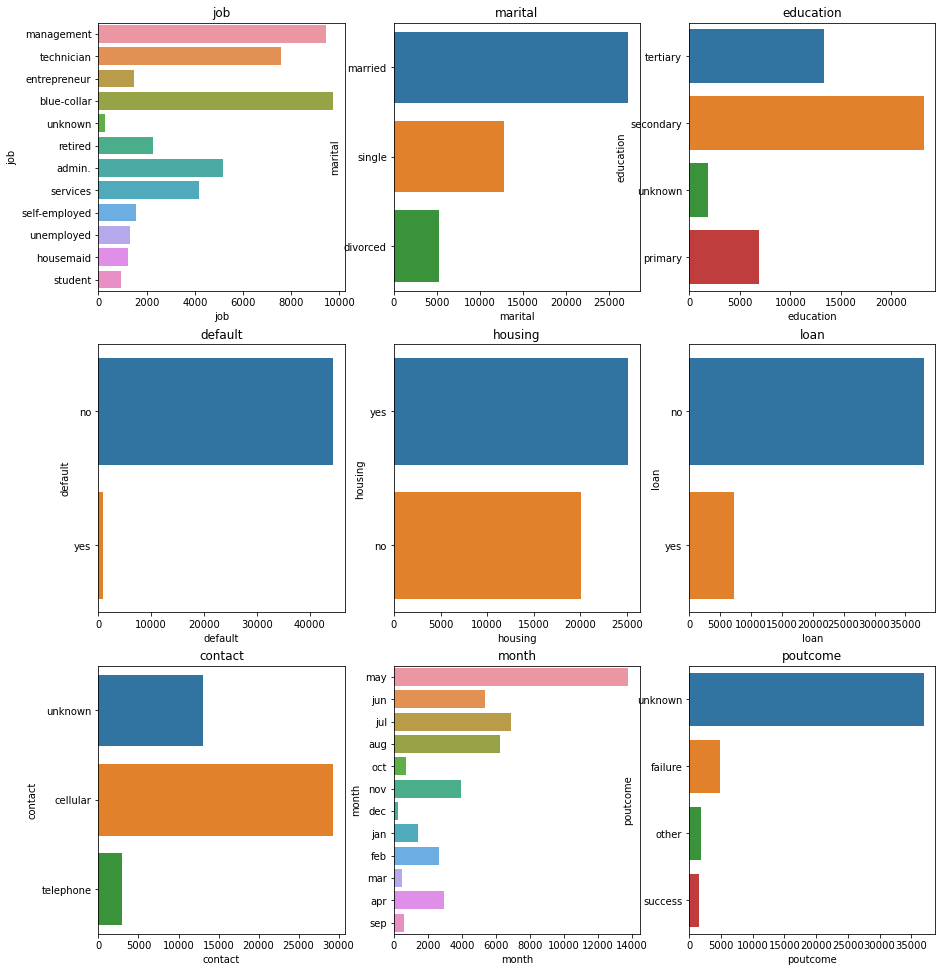

In [14]:
plt.figure(figsize=(15,70), facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=Bank_data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [ ]:
# most of the customers are from Blue-collar, Management, technician and admin jobs.
# Majority of the customers have Secondary education and beyond
# Majority of customers haven't defaulted . So this column can be removed. Very low variance
# Most of the people were called during May-Aug during the current campaign

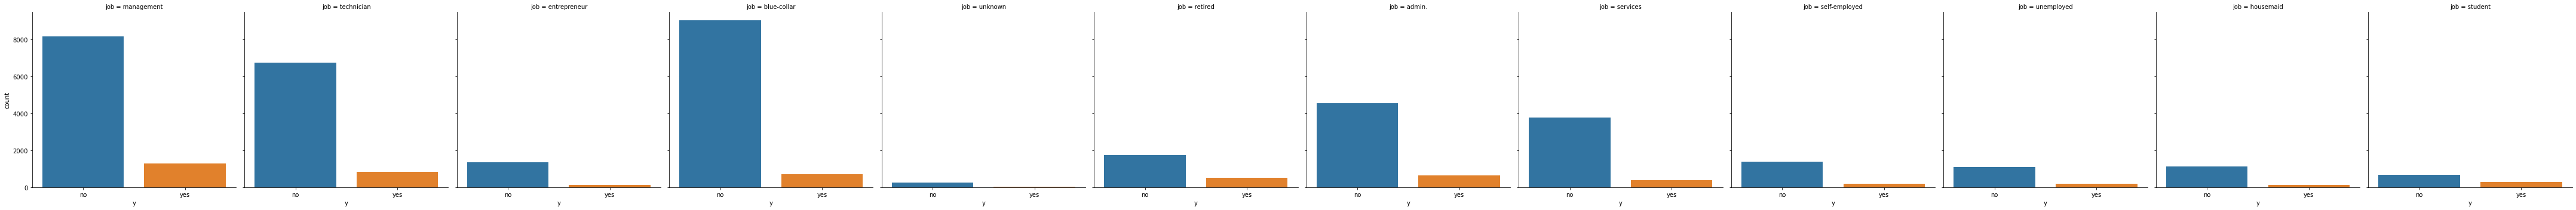

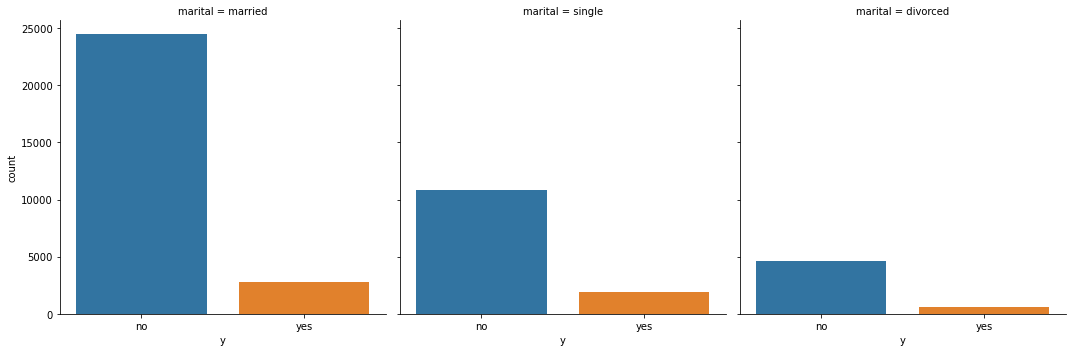

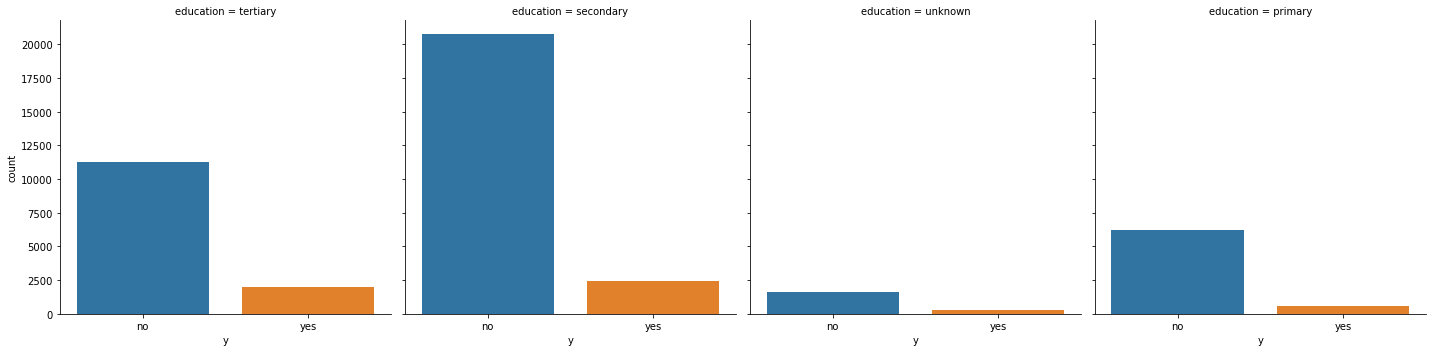

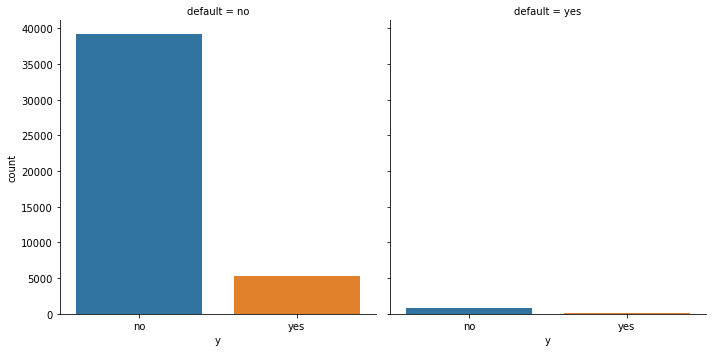

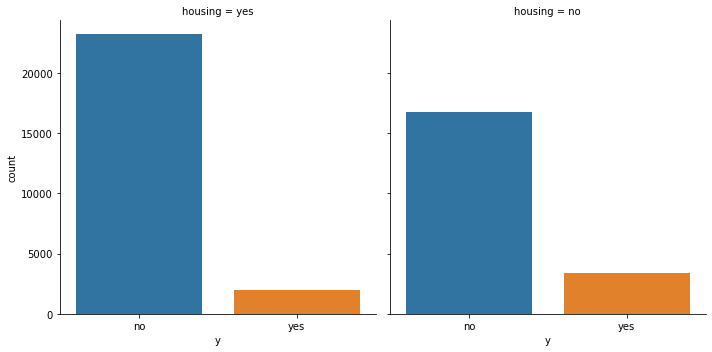

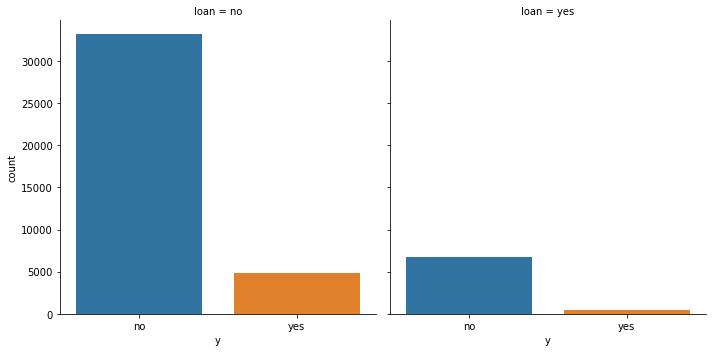

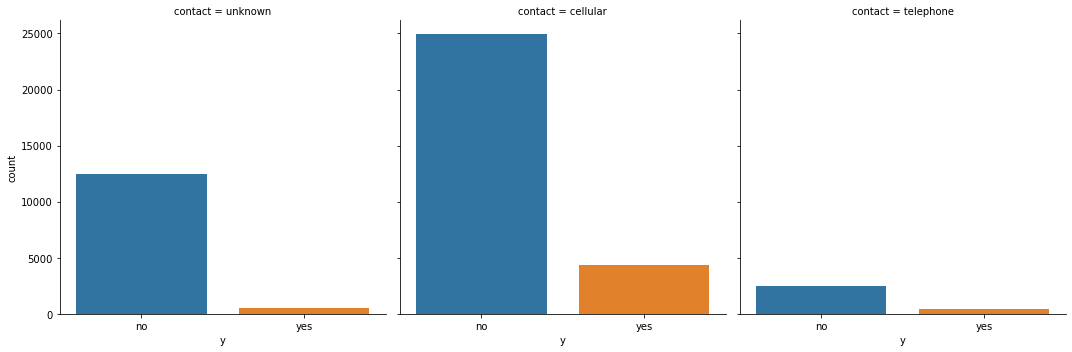

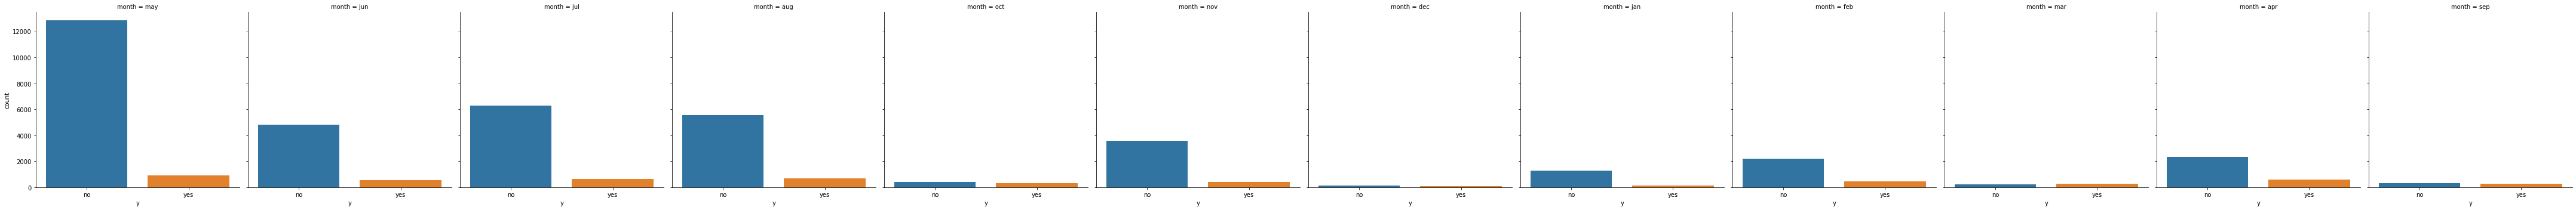

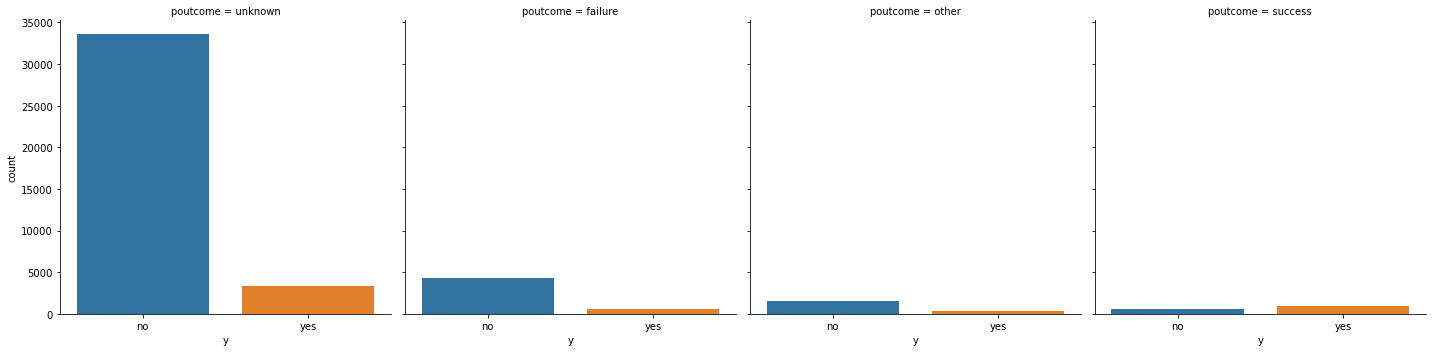

In [15]:
for categorical_feature in categorical_features:
    sns.catplot(x='y',col=categorical_feature,kind='count',data=Bank_data)
plt.show()

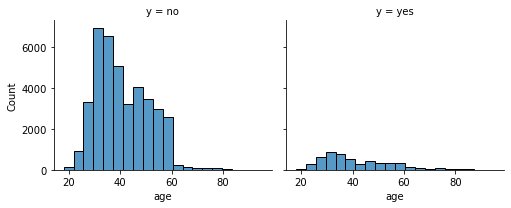

In [16]:
a=sns.FacetGrid(data=Bank_data,col='y',height=3,aspect=1.2)
a.map(sns.histplot,'age',bins=20)
plt.show()

In [ ]:
# from above graph most of the subscibers age is in between 30 and 60 

<AxesSubplot:xlabel='age', ylabel='y'>

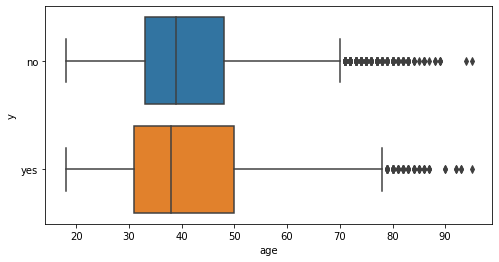

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(x='age',y='y',data=Bank_data)

In [ ]:
# In case of 'Not-Subscribed', 70 yrs+ is considered outlier, while for 'Subscribed' it is not.
# the average age for 'Subscribed' group is higher.

<AxesSubplot:xlabel='balance', ylabel='y'>

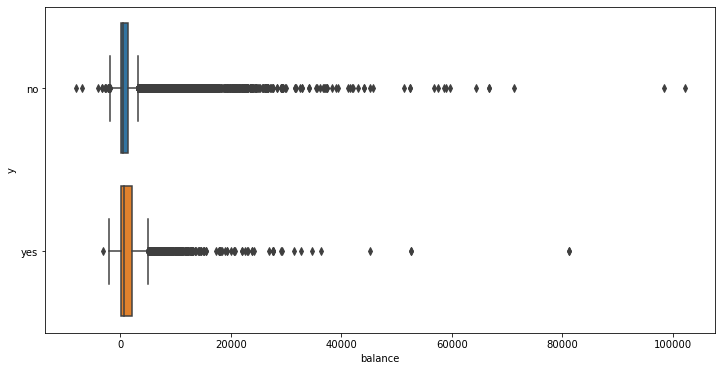

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x='balance',y='y',data=Bank_data)

In [ ]:
# balance is almost similar in both the group: 'Subscribed' and 'Not Surscribed'

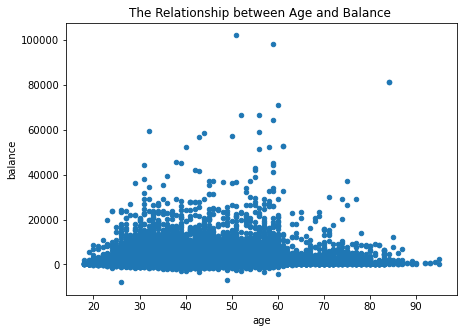

In [19]:
scatter_age_balance = Bank_data.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

<AxesSubplot:xlabel='day', ylabel='count'>

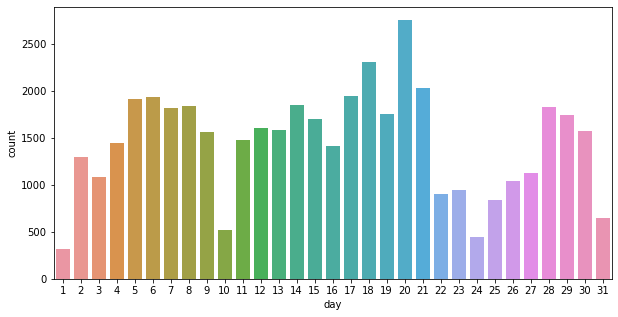

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='day',data=Bank_data)

<AxesSubplot:xlabel='duration', ylabel='y'>

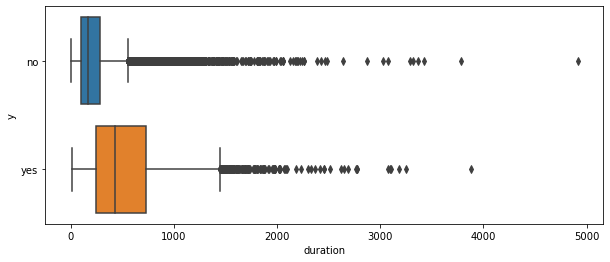

In [21]:
plt.figure(figsize=(10,4))
sns.boxplot(x='duration',y='y',data=Bank_data)

C:\Users\H P\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\H P\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


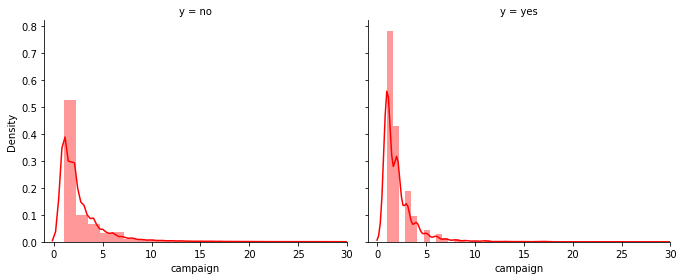

In [22]:
g=sns.FacetGrid(data=Bank_data,col='y',height=4,aspect=1.2,xlim=(-1,30))
g.map(sns.distplot,'campaign',color='red')

C:\Users\H P\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\H P\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


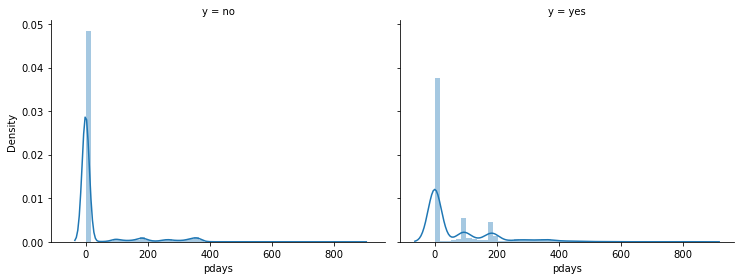

In [23]:
g=sns.FacetGrid(data=Bank_data,col='y',height=4,aspect=1.3)
g.map(sns.distplot,'pdays')

C:\Users\H P\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\H P\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


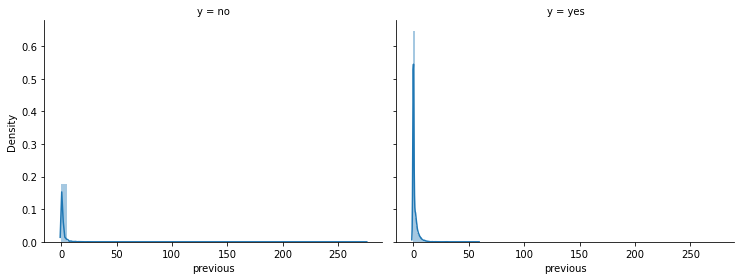

In [24]:
g=sns.FacetGrid(data=Bank_data,col='y',height=4,aspect=1.3)
g.map(sns.distplot,'previous')

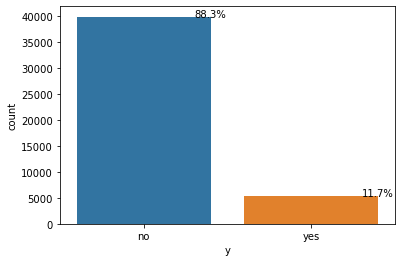

In [25]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='y',data=Bank_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(Bank_data))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

In [ ]:
#we see that longer calls during last contact are more likely to get converted,indicating they have taken time to understand about the product from the calling agents
# most of thos subscribed have been contacted between 0-3 times during this campaign.So, it makes sense not to contact people beyond at most 5 times during a campaign
#For most of the customers, they are being contacted for the first time in this campaign.However, some people who have been called 100 or 200 days ago during previous campaign have also been converted in this campaign.
#It also indicates that this Bank probably runs the campaign after every 100 days.
# In our current campaign only 11.7% of clients are subscribing. So we need to improve our run-rate by better targeting.We can decrease our operational resources by improving the prediction of who is going to subscribe, and who is not.

# Feature Engineering

In [6]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
Bank_data[categorical_features] = Bank_data[categorical_features].apply(LabelEncoder().fit_transform)
Bank_data.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no


In [7]:
target = {"y": {"no":0,"yes":1}}
Bank_data2 = Bank_data.replace(target)
Bank_data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [8]:
Bank_data2 = Bank_data2[Bank_data2['job'] != 'unknown']

Bank_data2.drop('poutcome', axis = 1, inplace = True)

Bank_data2['education'].replace("unknown", Bank_data2['education'].mode()[0], inplace = True)
Bank_data2['contact'].replace("unknown", Bank_data2['contact'].mode()[0], inplace = True)

In [ ]:
# Columns job, education, contact and poutcome have "unknown" values, which have to be filled.

# Job column: Ignore the 288 rows with unknown job because firstly there seems to be no reasonable values to be replaced because this is a small amount of data comparing to our dataset size;

# Poutcome column: Ignore this property since most of data are unknown

# Education and Contact columns will be filled with the reasonable most frequent values

In [9]:
x = Bank_data2.drop('y',axis=1)
y = Bank_data2['y']

# Model Building

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size=0.20)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [98]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [100]:
results_c = []
names_c = []

for name, model in models:
    kfold = KFold(n_splits=10)    
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.890262 (0.004835)
KNN: 0.889488 (0.006085)
DT: 0.871239 (0.005506)
NB: 0.854816 (0.005660)


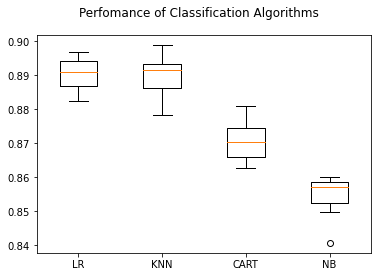

In [90]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

In [105]:
LR = LogisticRegression()
mdl = LR.fit(X_train, Y_train)

In [106]:
prediction = mdl.predict(X_test)

In [107]:
print(accuracy_score(Y_test, prediction))

0.891850049762247


In [17]:
from sklearn.metrics import confusion_matrix

[[7862  163]
 [ 815  203]]


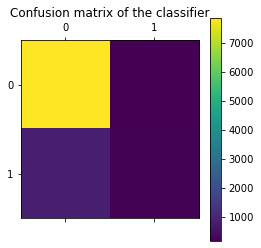

In [109]:

import pylab as pl

print(confusion_matrix(Y_test, prediction))

cm = confusion_matrix(Y_test, prediction)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

Accuracy: 0.891850049762247
Overall Precision: 0.5546448087431693
Overall Recall: 0.1994106090373281

AUC: 0.8640750601325672


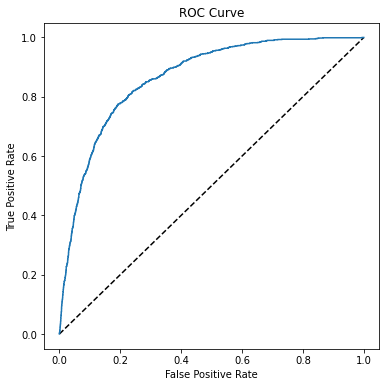

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
prediction = mdl.predict(X_test)
y_scores = mdl.predict_proba(X_test)

print('Accuracy:', accuracy_score(Y_test, prediction))
print("Overall Precision:",precision_score(Y_test, prediction))
print("Overall Recall:",recall_score(Y_test, prediction))
auc = roc_auc_score(Y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [96]:
from sklearn.metrics import classification_report

In [97]:

print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8025
           1       0.55      0.20      0.29      1018

    accuracy                           0.89      9043
   macro avg       0.73      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(Xne, yne)
y_pred = classifier.predict(X_test)
result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7399  599]
 [ 563  482]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7998
           1       0.45      0.46      0.45      1045

    accuracy                           0.87      9043
   macro avg       0.69      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043

Accuracy: 0.8715028198606657


In [75]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [76]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
print ("Accuracy is "), accuracy_score(Y_test,y_pred_en)*100

Accuracy is 


(None, 88.87537321685282)

In [101]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=0)

model = clf.fit(X_train, (Y_train))
print (model)

RandomForestClassifier(max_depth=3, random_state=0)


Confusion Matrix:
 [[8025    0]
 [1018    0]] 

Accuracy: 0.8874267389140772
Overall Precision: 0.0
Overall Recall: 0.0

AUC: 0.8725788761789349


C:\Users\H P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


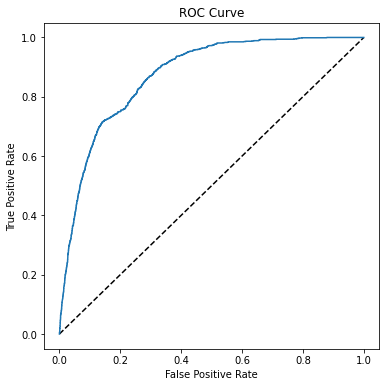

In [102]:

predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(Y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(Y_test, predictions))
print("Overall Precision:",precision_score(Y_test, predictions))
print("Overall Recall:",recall_score(Y_test, predictions))
auc = roc_auc_score(Y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [15]:
from sklearn.svm import SVC
accuracies = {}

svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)

acc = svm.score(X_test,Y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 89.17%


<AxesSubplot:title={'center':'Support Vector Machine Confusion Matrix'}>

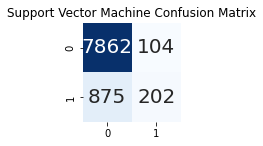

In [19]:
y_head_svm = svm.predict(X_test)
cm_svm = confusion_matrix(Y_test,y_head_svm)
plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 20})

# Conclusion

In [ ]:
# From above all the analysis the folling customers can be targed:
# 1: age < 30 or age > 60
# 2: students or retired people
# 3: a balance of more than 5000 euros
# By applying logistic regression algorithm, classification and estimation model were successfully built and had given the better result comparing to other models. With this model, the bank will be able to predict a customer's response to its telemarketing campaign before calling this customer. 
# In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposits, and call less to those who are unlikely to make term deposits.